In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df_cleaned = pd.read_csv(r"F:\Omar 3amora\Heart_Disease_Project\Data\heart_disease_cleaned.csv")
print(df_cleaned.shape)
print(df_cleaned.info())


(920, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   thalch                    920 non-null    float64
 5   oldpeak                   920 non-null    float64
 6   ca                        920 non-null    float64
 7   num                       920 non-null    int64  
 8   sex_Male                  920 non-null    bool   
 9   dataset_Hungary           920 non-null    bool   
 10  dataset_Switzerland       920 non-null    bool   
 11  dataset_VA Long Beach     920 non-null    bool   
 12  cp_atypical angina        920 non-null    bool   
 13  cp_non-anginal            920 non-null    bool   
 14  

In [14]:
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
X = df_cleaned[numeric_cols]
pca = PCA()
X_pca = pca.fit_transform(X)

Variance Ratio

In [15]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print explained variance per component
print("Explained variance ratio per component:\n", explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

Explained variance ratio per component:
 [8.69726437e-01 1.19160276e-01 6.31137119e-03 3.91665670e-03
 8.57348348e-04 1.72915173e-05 7.64454274e-06 2.97477093e-06]
Cumulative explained variance:
 [0.86972644 0.98888671 0.99519808 0.99911474 0.99997209 0.99998938
 0.99999703 1.        ]


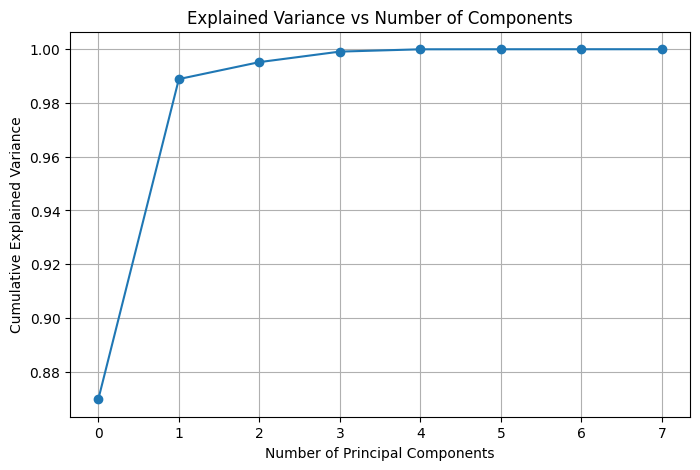

In [16]:
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

In [21]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to retain 95% variance:", n_components)


Number of components to retain 95% variance: 2


In [18]:
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X)

In [19]:
df_pca = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)])
print(df_pca.head())

          PC1        PC2
0  458.309875 -46.918198
1  464.793232   5.325821
2  454.810830 -51.276979
3  460.128326 -29.667713
4  450.433628 -74.911455


In [20]:
df_pca.to_csv(r"F:\Omar 3amora\Heart_Disease_Project\Data\heart_disease_pca.csv", index=False)
print("PCA-transformed dataset saved successfully!")

PCA-transformed dataset saved successfully!
